In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('visibility.csv')
df.head()

,DATE,VISIBILITY,DRYBULBTEMPF,WETBULBTEMPF,DewPointTempF,RelativeHumidity,WindSpeed,WindDirection,StationPressure,SeaLevelPressure,Precip
0,2010-01-01 00:51:00,6.0,33.0,32.0,31.0,92.0,0.0,0.0,29.97,29.99,0.01
1,2010-01-01 01:51:00,6.0,33.0,33.0,32.0,96.0,0.0,0.0,29.97,29.99,0.02
2,2010-01-01 02:51:00,5.0,33.0,33.0,32.0,96.0,0.0,0.0,29.97,29.99,0.02
3,2010-01-01 03:51:00,5.0,33.0,33.0,32.0,96.0,0.0,0.0,29.95,29.97,0.02
4,2010-01-01 04:51:00,5.0,33.0,32.0,31.0,92.0,0.0,0.0,29.93,29.96,0.02


In [6]:
# Checkking for missing values
df.isnull().sum().mean()

0.0

In [3]:
df.shape    # We have more 75000 records here.

(75083, 11)

In [5]:
df.DATE.dtype

dtype('O')

In [6]:
# Creating a column for day from the date fetaure in order to plot and check the visibiliry for on a particular day
df['Day'] = pd.DatetimeIndex(df['DATE']).day

In [7]:
# converting "ActivityDate column to Datetime dtype"
df['DATE'] = pd.to_datetime(df['DATE'])

In [8]:
df.DATE.dtype

dtype('<M8[ns]')

C:\Users\Sagar\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


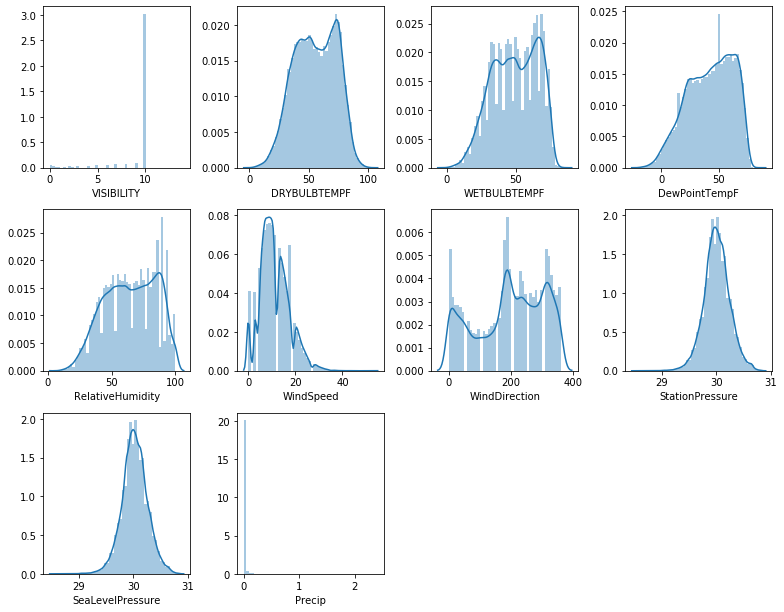

In [14]:
# Checking the relationship between dependent features abnd independent features:
plt.figure(figsize=(11,11))
plotnumber = 1
for column in df.drop(columns='DATE',axis=1):
    ax = plt.subplot(4,4,plotnumber)
    sns.distplot(df[column])
    plt.xlabel(column)
    plotnumber+=1
plt.tight_layout()

#### We can clearly see that except for StattionPressure, SeaLevelPressure, and Windspeed, all independent features are nowhere near normal distribution. So we need to use some scaling techniques before training the model.

#### We can apply Standardisation and other scaling techniques for scaling but before that we need to see the outliers as Standardisation/Normalization does not perform well with outliers.

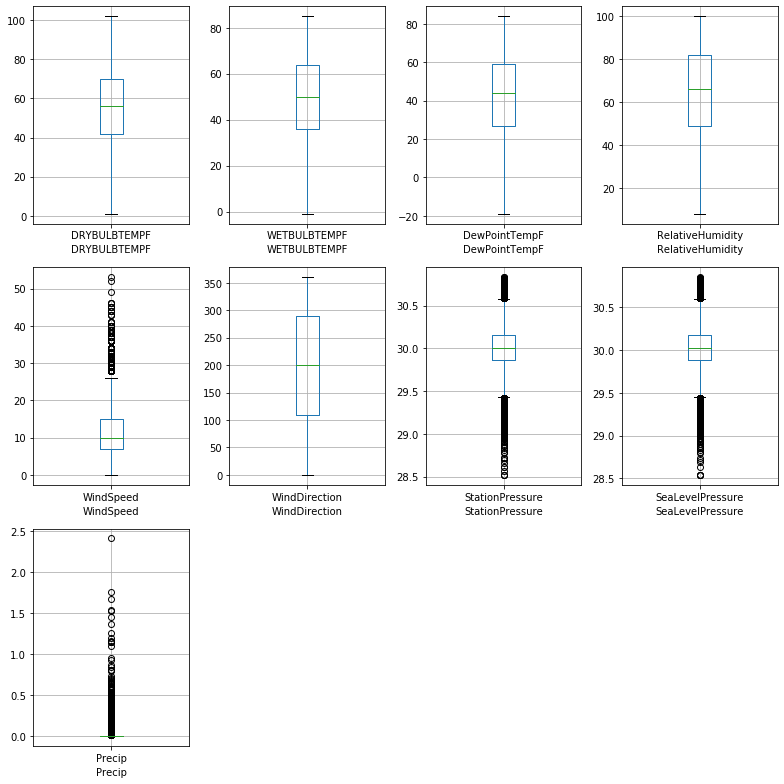

In [20]:
# Plotting boxpots which shows outliers in the dataset

plt.figure(figsize=(11,11))
plotnumber=1
for feature in df.drop(columns=['DATE','VISIBILITY'],axis=1):
    plt.subplot(3,4,plotnumber)
    df.boxplot(column=feature)
    plt.xlabel(feature)
    plotnumber+=1
plt.tight_layout()    

### Observations:
#### Now, we can clearly see that features "StationPressure" and "SeaLevelPressure" are almost the same distribution shape and simar distrubitution for outliers as well. 
#### Pricipitation is a feature which most values as 0 therefore, it can be removed. 
#### Windspeed also has outliers.

#### Therefore we can check with Q-Q plots with logarithmic , reciprocal, square root and exponential transformations for "Windspeed"  just for observation purpose.
#### As most of the features do not have outiers and since "StationPressure" and "SeaLevelPressure" already have normal distributions. So, a simple Standardisation will be helpful.
#### If Standardisation/Normalization does not work, we can use Machine Learning algorithms which are not dependent upon scaling.

In [24]:
# Now we have some which features which are skewed and 3 of the features do not have bormal distribution
# Let's work with Q-Q plots to check the scaling that we can apply:

import scipy.stats as stat
import pylab
def plot_QQ(df,feature_1,feature_2,feature_3,feature_4,feature_5):
    plt.figure(figsize=(10,10))#probplot is Q-Q plot
    plt.subplot(3,3,1)  #3 rows, 3 columns, 1st placement
    sns.distplot(df[feature_1])
    stat.probplot(df[feature_1],dist='norm',plot=pylab)
    plt.xlabel(feature_1)
    plt.subplot(3,3,2)
    stat.probplot(df[feature_2],dist='norm',plot=pylab)
    plt.xlabel(feature_2)
    plt.subplot(3,3,3)
    stat.probplot(df[feature_3],dist='norm',plot=pylab)
    plt.xlabel(feature_3)
    plt.subplot(3,3,7)
    stat.probplot(df[feature_4],dist='norm',plot=pylab)
    plt.xlabel(feature_4)
    plt.subplot(3,3,8)
    stat.probplot(df[feature_5],dist='norm',plot=pylab)
    plt.xlabel(feature_5)
    plt.show()

In [26]:
# Creating a function which creates new features and applies logarithmic , reciprocal, square root and
# exponential transformations to the same.
dataframe = df.copy()
def transform_feat(dataframe,feature):
    dataframe[feature+'_log'] = np.log(dataframe[feature])
    dataframe[feature+'_reciprocal'] = 1/dataframe[feature]
    dataframe[feature+'_sqrt'] = np.sqrt(dataframe[feature])
    dataframe[feature+'_exp'] = dataframe[feature]**(1/1.2)

In [28]:
df.head()

,DATE,VISIBILITY,DRYBULBTEMPF,WETBULBTEMPF,DewPointTempF,RelativeHumidity,WindSpeed,WindDirection,StationPressure,SeaLevelPressure,Precip
0,1970-01-01 00:00:00.000000001,6.0,33.0,32.0,31.0,92.0,0.0,0.0,29.97,29.99,0.01
1,1970-01-01 00:00:00.000000001,6.0,33.0,33.0,32.0,96.0,0.0,0.0,29.97,29.99,0.02
2,1970-01-01 00:00:00.000000001,5.0,33.0,33.0,32.0,96.0,0.0,0.0,29.97,29.99,0.02
3,1970-01-01 00:00:00.000000001,5.0,33.0,33.0,32.0,96.0,0.0,0.0,29.95,29.97,0.02
4,1970-01-01 00:00:00.000000001,5.0,33.0,32.0,31.0,92.0,0.0,0.0,29.93,29.96,0.02


In [29]:
# Calling the transform_feat function:
transform_feat(dataframe,'WindSpeed')

C:\Users\Sagar\anaconda3\lib\site-packages\pandas\core\series.py:856: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [30]:
dataframe.head()

,DATE,VISIBILITY,DRYBULBTEMPF,WETBULBTEMPF,DewPointTempF,RelativeHumidity,WindSpeed,WindDirection,StationPressure,SeaLevelPressure,...,WindSpeed_sqrt,WindSpeed_exp,StationPressure_log,StationPressure_reciprocal,StationPressure_sqrt,StationPressure_exp,SeaLevelPressure_log,SeaLevelPressure_reciprocal,SeaLevelPressure_sqrt,SeaLevelPressure_exp
0,1970-01-01 00:00:00.000000001,6.0,33.0,32.0,31.0,92.0,0.0,0.0,29.97,29.99,...,0.0,0.0,3.400197,0.033367,5.474486,17.004830,3.400864,0.033344,5.476313,17.014286
1,1970-01-01 00:00:00.000000001,6.0,33.0,33.0,32.0,96.0,0.0,0.0,29.97,29.99,...,0.0,0.0,3.400197,0.033367,5.474486,17.004830,3.400864,0.033344,5.476313,17.014286
2,1970-01-01 00:00:00.000000001,5.0,33.0,33.0,32.0,96.0,0.0,0.0,29.97,29.99,...,0.0,0.0,3.400197,0.033367,5.474486,17.004830,3.400864,0.033344,5.476313,17.014286
3,1970-01-01 00:00:00.000000001,5.0,33.0,33.0,32.0,96.0,0.0,0.0,29.95,29.97,...,0.0,0.0,3.399529,0.033389,5.472659,16.995373,3.400197,0.033367,5.474486,17.004830
4,1970-01-01 00:00:00.000000001,5.0,33.0,32.0,31.0,92.0,0.0,0.0,29.93,29.96,...,0.0,0.0,3.398861,0.033411,5.470832,16.985914,3.399863,0.033378,5.473573,17.000101


C:\Users\Sagar\anaconda3\lib\site-packages\numpy\lib\function_base.py:2449: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
C:\Users\Sagar\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\Sagar\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\Sagar\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


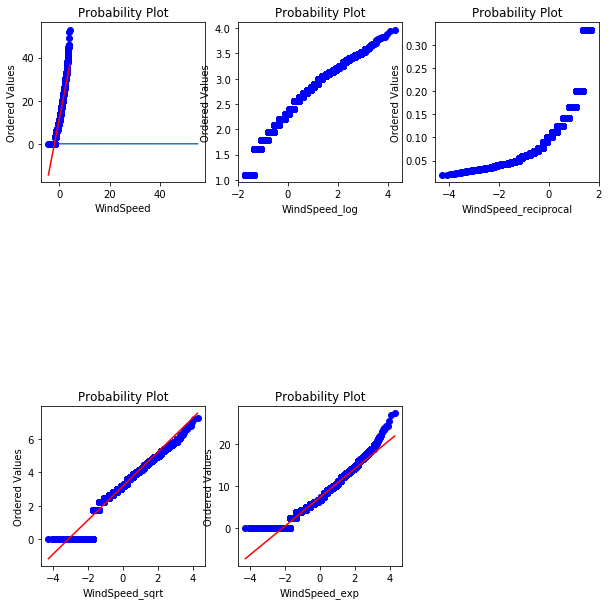

In [31]:
# Plotting the Q-Q plots for 'Windspeed'.
plot_QQ(dataframe,'WindSpeed','WindSpeed_log','WindSpeed_reciprocal','WindSpeed_sqrt','WindSpeed_exp')

#### We can clearly see sqrt and exponential ransformations work well for Windspeed but we have a lot of outliers. For one specific feature we don't necessarily need sqrt/exponential transfromation.

#### We are now going to work with Standardisation.

In [35]:
df_2 = df.copy()
df_2 = df_2.drop(columns=['DATE'],axis=1)

In [36]:
from sklearn.preprocessing import StandardScaler

In [41]:
std_scaler = StandardScaler()
std_scaled_data = std_scaler.fit_transform(df_2)

In [42]:
std_df = pd.DataFrame(std_scaled_data,columns=df_2.columns)

In [43]:
std_df.head()

,VISIBILITY,DRYBULBTEMPF,WETBULBTEMPF,DewPointTempF,RelativeHumidity,WindSpeed,WindDirection,StationPressure,SeaLevelPressure,Precip
0,-1.458430,-1.285227,-1.070741,-0.583519,1.366308,-1.844489,-1.825118,-0.151291,-0.154010,0.125046
1,-1.458430,-1.285227,-1.008947,-0.532440,1.567325,-1.844489,-1.825118,-0.151291,-0.154010,0.401587
2,-1.912502,-1.285227,-1.008947,-0.532440,1.567325,-1.844489,-1.825118,-0.151291,-0.154010,0.401587
3,-1.912502,-1.285227,-1.008947,-0.532440,1.567325,-1.844489,-1.825118,-0.236336,-0.239455,0.401587
4,-1.912502,-1.285227,-1.070741,-0.583519,1.366308,-1.844489,-1.825118,-0.321380,-0.282178,0.401587


C:\Users\Sagar\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


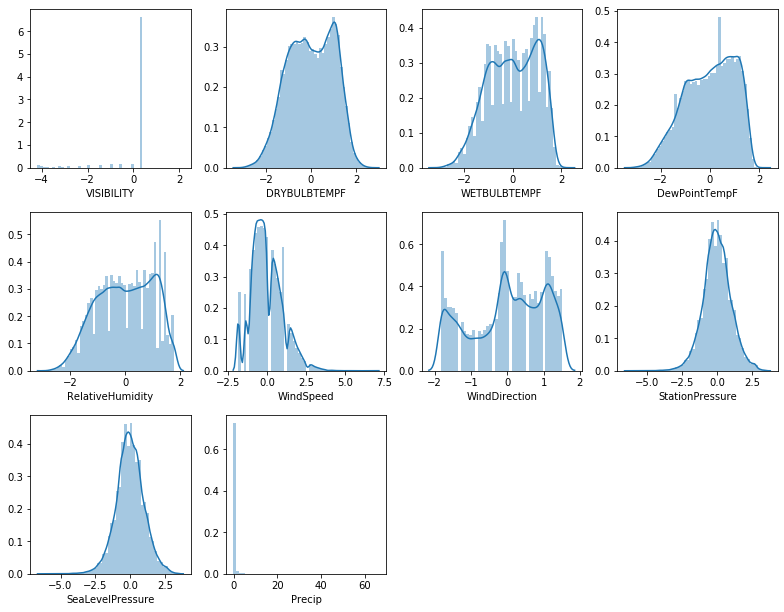

In [45]:
plt.figure(figsize=(11,11))
plotnumber = 1
for feature in std_df:
    ax = plt.subplot(4,4,plotnumber)
    sns.distplot(std_df[feature])
    plt.xlabel(feature)
    plotnumber+=1
plt.tight_layout()

#### As we can see, no change took place in the distributions after Standar scaling. Let's use normalization. Although, it will not be helpful as we know just by looking at Standardisation but let's just see for observation purpose.

#### We are now going to work with Normalization.

In [46]:
df_3 = df.copy()
df_3 = df_3.drop(columns=['DATE'],axis=1)

In [49]:
from sklearn.preprocessing import MinMaxScaler

In [50]:
min_max_scaler = MinMaxScaler()
min_max_scaled_data = min_max_scaler.fit_transform(df_3)

In [51]:
min_max_df = pd.DataFrame(min_max_scaled_data,columns=df_3.columns)

In [52]:
min_max_df.head()

,VISIBILITY,DRYBULBTEMPF,WETBULBTEMPF,DewPointTempF,RelativeHumidity,WindSpeed,WindDirection,StationPressure,SeaLevelPressure,Precip
0,0.428571,0.316832,0.383721,0.485437,0.913043,0.0,0.0,0.627706,0.627706,0.004149
1,0.428571,0.316832,0.395349,0.495146,0.956522,0.0,0.0,0.627706,0.627706,0.008299
2,0.357143,0.316832,0.395349,0.495146,0.956522,0.0,0.0,0.627706,0.627706,0.008299
3,0.357143,0.316832,0.395349,0.495146,0.956522,0.0,0.0,0.619048,0.619048,0.008299
4,0.357143,0.316832,0.383721,0.485437,0.913043,0.0,0.0,0.610390,0.614719,0.008299


C:\Users\Sagar\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


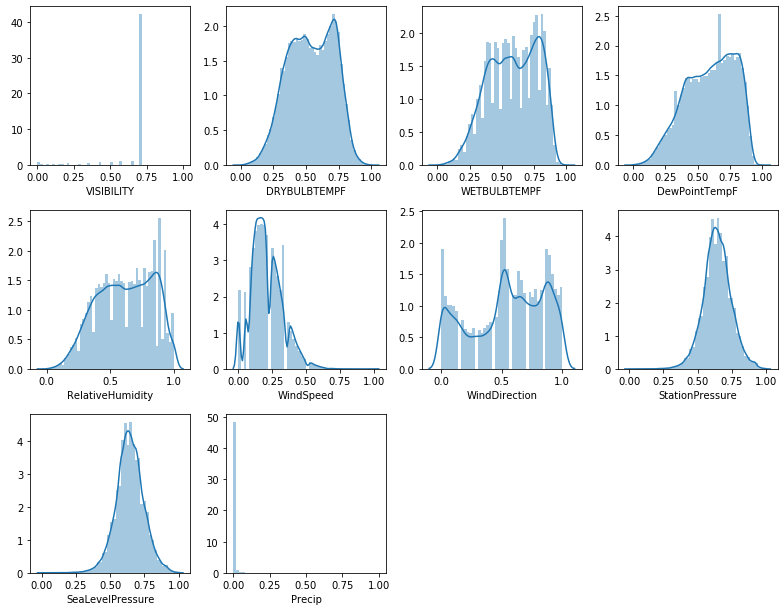

In [53]:
plt.figure(figsize=(11,11))
plotnumber = 1
for feature in std_df:
    ax = plt.subplot(4,4,plotnumber)
    sns.distplot(min_max_df[feature])
    plt.xlabel(feature)
    plotnumber+=1
plt.tight_layout()

#### As we can see not much change has happened to the distributions, we can now try with robust scaling method.

In [65]:
df_4 = df.copy()
df_4.drop(columns=['DATE'],axis=1,inplace=True) # We have dropped 'ActivityDate' because it has datetime values which 
                                                # cannot be fit and transformed using Robust Scaler

In [66]:
from sklearn.preprocessing import RobustScaler
robust_scaler = RobustScaler()

In [67]:
scaled_data = robust_scaler.fit_transform(df_4)

In [68]:
robust_df = pd.DataFrame(scaled_data,columns=df_4.columns)

In [69]:
robust_df.head()

,VISIBILITY,DRYBULBTEMPF,WETBULBTEMPF,DewPointTempF,RelativeHumidity,WindSpeed,WindDirection,StationPressure,SeaLevelPressure,Precip,Day
0,-4.0,-0.821429,-0.642857,-0.40625,0.787879,-1.25,-1.111111,-0.103448,-0.103448,0.01,-1.0
1,-4.0,-0.821429,-0.607143,-0.37500,0.909091,-1.25,-1.111111,-0.103448,-0.103448,0.02,-1.0
2,-5.0,-0.821429,-0.607143,-0.37500,0.909091,-1.25,-1.111111,-0.103448,-0.103448,0.02,-1.0
3,-5.0,-0.821429,-0.607143,-0.37500,0.909091,-1.25,-1.111111,-0.172414,-0.172414,0.02,-1.0
4,-5.0,-0.821429,-0.642857,-0.40625,0.787879,-1.25,-1.111111,-0.241379,-0.206897,0.02,-1.0


C:\Users\Sagar\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


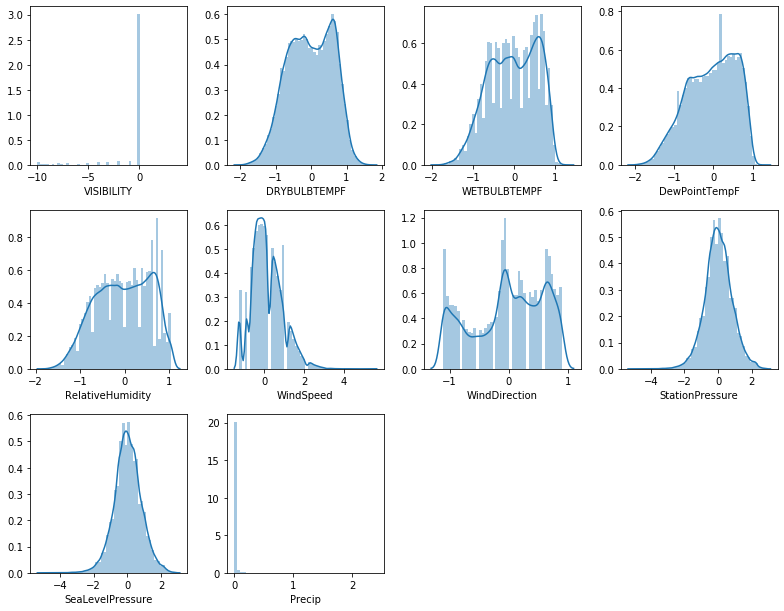

In [60]:
plt.figure(figsize=(11,11))
plotnumber = 1
for feature in robust_df:
    plt.subplot(4,4,plotnumber)
    sns.distplot(robust_df[feature])
    plt.xlabel(feature)
    plotnumber+=1
plt.tight_layout()    

#### As we can clearly see that even after applying all the scaling methods including Robust Scaler, the distributions remain the same. Therefore, we are not going to perform any further scaling on the dataset. As a result, we are going to use the algorithms that do not require scaling/normal distribution. We are now going to check colinearity between various fetaures.

In [68]:
A= df.drop(columns=['DATE','VISIBILITY'],axis=1)
b = df['VISIBILITY']

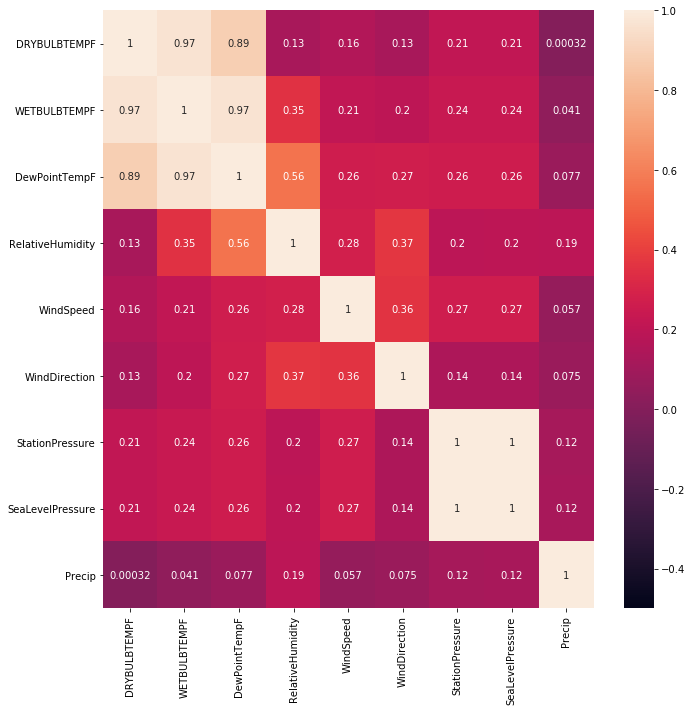

In [69]:
# Checking for colinearity between various features. We are using robust scaled dataset here as outliers affect colinearity
plt.figure(figsize=(11,11))
sns.heatmap(A.corr().abs(),vmin=-0.5,vmax=1,annot=True)
plt.show()

##### As per the problem statement, distribution similarity as well as colinearity, the features which are highly colinear are:
##### 'DATE','Precipitation','WETBULBTEMPF','DewPointTempF','StationPressure'. Therefore,  we can remove these.


#### Now, checking relationship between independent and dependent features:

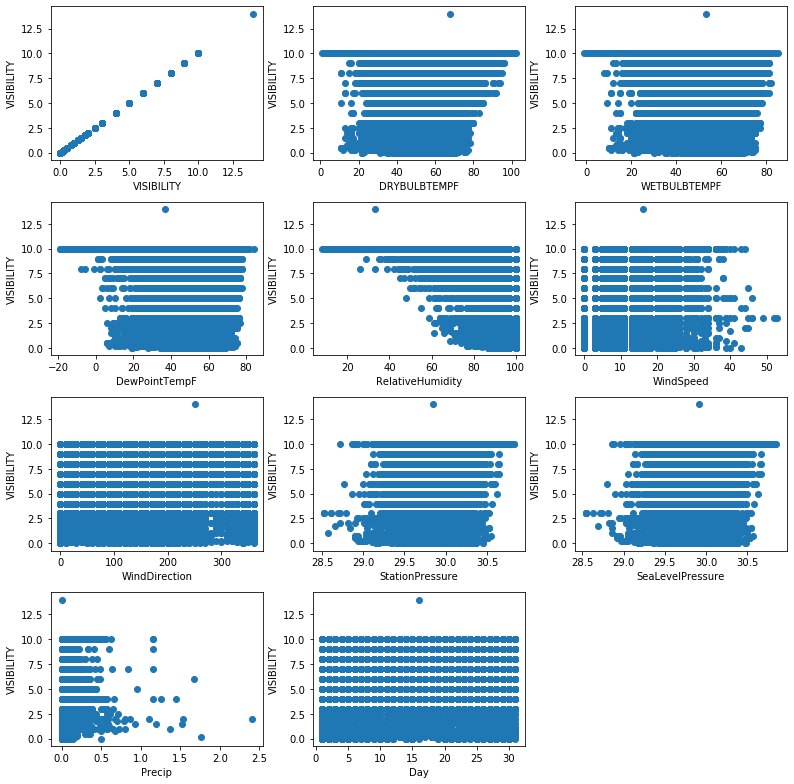

In [10]:
plt.figure(figsize=(11,11))
plotnumber=1
for feature in df.drop(columns=['DATE'],axis=1):
    plt.subplot(4,3,plotnumber)
    plt.scatter(df[feature],df['VISIBILITY'])
    #plt.title(f'Relationship between {feature} and VISIBILITY')
    plt.xlabel(feature)
    plt.ylabel('VISIBILITY')
    plotnumber+=1
plt.tight_layout()

#### It is clear from the above observation that there is no proper relationship between dependent features and independent feature 'VISIBILITY'.

#### Therefore, according to every analysis till now, we can remove the features:
'DATE',<br/>'Precipitation',<br/>'WETBULBTEMPF',<br/>'DewPointTempF',<br/>'StationPressure'

In [78]:
X = df.drop(columns=['DATE','Precip','WETBULBTEMPF','DewPointTempF','StationPressure','Day','VISIBILITY'],axis=1)
y = df['VISIBILITY']

In [80]:
# G = robust_df.drop(columns=['Precip','WETBULBTEMPF','DewPointTempF','StationPressure','Day','VISIBILITY'],axis=1)
# H = robust_df['VISIBILITY']

#### Also, we will not use any scaling techniques as discussed above and will only use algorithms such as Random Forest and XGboost which do not require scaling and are not affected by outliers.

#### This concludes the EDA part. 

### Hyperparameter Tuning

In [81]:
X.shape

(75083, 5)

#### Train Test Split

In [82]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=10)

#### Random Forest

In [61]:
# kf = KFold(n_splits=2, random_state=None,shuffle=False) 

# for train_index, test_index in kf.split(X):
#     print("Train:", train_index, "Validation:",test_index)
#     X_train, X_test = X[train_index], X[test_index] 
#     y_train, y_test = y[train_index], y[test_index]

In [83]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [84]:
clf = RandomForestRegressor()
param_grid = {"n_estimators": [10, 100,300,500], "criterion": ['mse'],
                               "max_depth": range(2, 4, 1), "max_features": ['auto','log2'], "min_samples_leaf": [1,2,3,4,5]}

In [85]:
grid = GridSearchCV(estimator=clf,param_grid=param_grid,n_jobs=-1,cv=4,verbose=2)
grid.fit(X_train,y_train)

Fitting 4 folds for each of 80 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   51.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:  7.8min finished


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [86]:
criterion = grid.best_params_['criterion']
n_estimators = grid.best_params_['n_estimators']
max_depth = grid.best_params_['max_depth']
max_features = grid.best_params_['max_features']
min_samples_leaf = grid.best_params_['min_samples_leaf']

In [87]:
clf = RandomForestRegressor(n_estimators=n_estimators,criterion=criterion,max_depth=max_depth,max_features=max_features,
                            min_samples_leaf=min_samples_leaf,n_jobs=-1)
clf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=3, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [114]:
clf.score(X_train,y_train)

0.5006198904861404

In [95]:
from sklearn.metrics import r2_score

In [117]:
y_pred = clf.predict(X_test)
score = r2_score(y_test,y_pred)
score

0.4907679267965326

#### Checking for mean squared error and root mean squared error:

In [89]:
from sklearn.metrics import mean_squared_error

In [90]:
y_pred_2 = clf.predict(X_test)
mse = mean_squared_error(y_test,y_pred_2)
rmse = mean_squared_error(y_test,y_pred_2,squared=False)

In [91]:
print(f'mse: {mse},rmse: {rmse}')

mse: 2.4282488793346415,rmse: 1.5582839533713493


##### Checking with cross_val_score

In [120]:
# from sklearn.model_selection import KFold
# cv = KFold(n_splits=100)

from sklearn.model_selection import cross_val_score
score = cross_val_score(clf,X,y,scoring='r2',cv=12,verbose=2)
score.mean()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] ................................................. , total=   7.5s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.4s remaining:    0.0s


[CV] ................................................. , total=   7.3s
[CV]  ................................................................
[CV] ................................................. , total=   7.6s
[CV]  ................................................................
[CV] ................................................. , total=   7.6s
[CV]  ................................................................
[CV] ................................................. , total=   7.6s
[CV]  ................................................................
[CV] ................................................. , total=   7.7s
[CV]  ................................................................
[CV] ................................................. , total=   7.6s
[CV]  ................................................................
[CV] ................................................. , total=   8.1s
[CV]  ................................................................
[CV] .

[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:  1.5min finished


0.4672706169212553

#### XG Boost

In [104]:
from xgboost import XGBRegressor 

In [107]:
xgb = XGBRegressor()
param_grid_xgboost = {

                'learning_rate': [0.3, 0.1, 0.05, 0.001],
                'max_depth': range(3,10,2),
                'n_estimators': [10, 50, 100, 300,500],
                'booster': ['gbtree','gblinear'],
                'gamma': [0,0.1,0.2,0.3,0.4,0.5,15,20],
                'min_child_weight': [6,7,8,9],
                'subsample': [0.6,0.7,0.8,0.9],
                'colsample_bytree': [0.6,0.7,0.8,0.9],
                'reg_lambda': [0, 0.001, 0.005, 0.01, 0.05],
                'reg_alpha': [0, 0.001, 0.005, 0.01, 0.05]
                
 }

In [39]:
grid = GridSearchCV(estimator=xgb,param_grid=param_grid_xgboost,n_jobs=-1,cv=2,verbose=5)
grid.fit(X_train,y_train)

Fitting 2 folds for each of 150 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   23.8s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  8.9min finished


GridSearchCV(cv=2, error_score=nan,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estima...
             param_grid={'booster': ['gbtree'], 'colsample_bytree': [0.9],
                         'gamma': [0, 0.1, 0.2, 0.3, 0.4, 0.5],
                         'learning_rate': [0.1], 'max_depth': [3],
                         'min_child_weight': [8], 'n_estimators': [500],
             

In [40]:
learning_rate = grid.best_params_['learning_rate']
max_depth = grid.best_params_['max_depth']
n_estimators = grid.best_params_['n_estimators']
booster = grid.best_params_['booster']
gamma = grid.best_params_['gamma']
min_child_weight = grid.best_params_['min_child_weight']
subsample = grid.best_params_['subsample']
colsample_bytree = grid.best_params_['colsample_bytree']
reg_lambda = grid.best_params_['reg_lambda']
reg_alpha = grid.best_params_['reg_alpha']

print(f' learning rate: {learning_rate}, max_depth: {max_depth}, n_estimators: {n_estimators}, booster: {booster}',
      f' gamma: {gamma}, min_child_weight: {min_child_weight}, subsample: {subsample}, colsample_bytree: {colsample_bytree}',
      f' reg_lambda: {reg_lambda}, reg_alpha: {reg_alpha}')

 learning rate: 0.1, max_depth: 3, n_estimators: 500, booster: gbtree  gamma: 0, min_child_weight: 8, subsample: 0.7, colsample_bytree: 0.9  reg_lambda: 0.001, reg_alpha: 0.005


In [109]:
xgb = XGBRegressor(objective='reg:squarederror',learning_rate=learning_rate,max_depth=max_depth,n_estimators=n_estimators,
                  booster=booster,gamma=gamma,min_child_weight=min_child_weight,subsample=subsample,colsample_bytree=colsample_bytree,
                  reg_lambda=reg_lambda,reg_alpha=reg_alpha,n_jobs=-1)
# xgb = XGBRegressor(objective='reg:squarederror',learning_rate=0.1,max_depth=3,n_estimators=500,
#                   booster='gbtree',gamma=0,min_child_weight=8,subsample=0.7,colsample_bytree=0.9,
#                   reg_lambda=0.001,reg_alpha=0.005,n_jobs=-1)

xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.9, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=3,
             min_child_weight=8, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=-1, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0.005,
             reg_lambda=0.001, scale_pos_weight=1, subsample=0.7,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [122]:
xgb.score(X_train,y_train)

0.6057896843194066

In [110]:
y_pred_xgb = xgb.predict(X_test)
score_xgb = r2_score(y_test,y_pred_xgb)
score_xgb

0.5557091744784235

##### Checking with  cross_val_score

In [121]:
from sklearn.model_selection import cross_val_score
cross_val_score_xgb = cross_val_score(xgb,X,y,scoring='r2',cv=15,verbose=15).mean()
cross_val_score_xgb

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] .................................... , score=0.617, total=  11.9s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.8s remaining:    0.0s


[CV] .................................... , score=0.552, total=  11.9s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   23.7s remaining:    0.0s


[CV] .................................... , score=0.531, total=  12.0s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   35.7s remaining:    0.0s


[CV] .................................... , score=0.564, total=  12.1s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   47.8s remaining:    0.0s


[CV] .................................... , score=0.527, total=  11.7s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   59.5s remaining:    0.0s


[CV] .................................... , score=0.627, total=  11.9s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  1.2min remaining:    0.0s


[CV] .................................... , score=0.506, total=  12.9s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  1.4min remaining:    0.0s


[CV] .................................... , score=0.658, total=  14.0s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  1.6min remaining:    0.0s


[CV] .................................... , score=0.561, total=  14.1s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  1.9min remaining:    0.0s


[CV] .................................... , score=0.484, total=  14.0s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  2.1min remaining:    0.0s


[CV] .................................... , score=0.604, total=  13.1s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:  2.3min remaining:    0.0s


[CV] .................................... , score=0.381, total=  12.1s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:  2.5min remaining:    0.0s


[CV] .................................... , score=0.447, total=  12.3s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:  2.7min remaining:    0.0s


[CV] ................................... , score=-0.082, total=  12.3s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:  2.9min remaining:    0.0s


[CV] .................................... , score=0.331, total=  12.3s


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  3.1min finished


0.4872472065749696

#### We can clearly see that XGBoost provides a better R2 score. So, XGBoost clearly is the winner here.

#### Scaling some of the data training and test data using RobustScaler as we have outliers as well just to see if we get any improvement in the r2 score for both the algorithms.

In [126]:
# Creating a function for scaling data using RobustScaling library
from sklearn.preprocessing import RobustScaler
def robustscale(I):
    scaler = RobustScaler()
    scaler.fit_transform(I)
    scaled = pd.DataFrame(scaler.fit_transform(I),columns=I.columns)
    return scaled    

In [127]:
X_train_scaled = robustscale(X_train)
X_test_scaled = robustscale(X_test)

#### Random Forest (Post scaling)

In [128]:
grid = GridSearchCV(estimator=clf,param_grid=param_grid,n_jobs=-1,cv=4,verbose=2)
grid.fit(X_train_scaled,y_train)

Fitting 4 folds for each of 80 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed: 10.4min finished


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=3,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=2,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=300, n_jobs=-1,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs=-1

In [129]:
criterion = grid.best_params_['criterion']
n_estimators = grid.best_params_['n_estimators']
max_depth = grid.best_params_['max_depth']
max_features = grid.best_params_['max_features']
min_samples_leaf = grid.best_params_['min_samples_leaf']

In [131]:
clf = RandomForestRegressor(n_estimators=n_estimators,criterion=criterion,max_depth=max_depth,max_features=max_features,
                            min_samples_leaf=min_samples_leaf,n_jobs=-1)
clf.fit(X_train_scaled, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=3, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [133]:
clf.score(X_train_scaled,y_train)

0.5002589134579123

In [134]:
from sklearn.metrics import r2_score

In [135]:
y_pred = clf.predict(X_test_scaled)
score = r2_score(y_test,y_pred)
score

0.48850731694613425

#### XGBoost (Post scaling)

In [137]:
# xgb = XGBRegressor(objective='reg:squarederror',learning_rate=learning_rate,max_depth=max_depth,n_estimators=n_estimators,
#                   booster=booster,gamma=gamma,min_child_weight=min_child_weight,subsample=subsample,colsample_bytree=colsample_bytree,
#                   reg_lambda=reg_lambda,reg_alpha=reg_alpha,n_jobs=-1)
xgb = XGBRegressor(objective='reg:squarederror',learning_rate=0.1,max_depth=3,n_estimators=500,
                  booster='gbtree',gamma=0,min_child_weight=8,subsample=0.7,colsample_bytree=0.9,
                  reg_lambda=0.001,reg_alpha=0.005,n_jobs=-1)

xgb.fit(X_train_scaled, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.9, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=3,
             min_child_weight=8, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=-1, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0.005,
             reg_lambda=0.001, scale_pos_weight=1, subsample=0.7,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [138]:
xgb.score(X_train_scaled,y_train)

0.6065489911825648

In [139]:
y_pred_xgb = xgb.predict(X_test_scaled)
score_xgb = r2_score(y_test,y_pred_xgb)
score_xgb

0.5463903710878402

#### As we can see there is not much of a difference in the two approaches. We will still scale just to make sure that there is no effect of outliers and change of values on the model by the new test dataset. 